In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath
from jwlab.ml_prep_graphs import prep_ml_graphs 
from jwlab.ml_prep_graphs_first20 import prep_ml_graphs_first20
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from jwlab.data_graph import plot_error_rate_window, run_plot, plot_error_rate_window_single
import numpy

In [ ]:
#participants = ["109", "111", "112", "115", "116", "117", "119", "120", "122", "124"]
participants = ["105", "107", "109", "111", "112", "115", "116", "117", "119", "121", "122", "120", "124"]


In [2]:
#participants = ["930", "932", "904", "905", "906", "908", "909", "912","913", "914", "916", "917", "919",\
#               "920", "921", "923", "924", "927", "928", "929"]
participants = ["904", "905", "906", "909", "910", "912", "908", "913", "914", "916", "917", "919", "920", "921", "923", "924","927", "928", "929", "930", "932"]


In [ ]:
#train on raw, test on avg

participants_test = participants[:]
participants_train = participants[:]
print(participants_train)
print(participants_test)
    
X_train_n,y_train_n, good_trial_count= prep_ml_graphs_first20(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="no_averaging")
#X_test_n,y_test_n, good_trial_count = prep_ml_graphs_first20(cleaned_data_filepath, participants, downsample_num=1000, averaging="average_trials")
X_test_n, y_test_n, good_trial_count = prep_ml_graphs_first20(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="average_trials_and_participants")
    
model = SVC(gamma=.001, kernel = 'rbf', C = 1e-6)
    
prediction_error = [[0 for i in range(len(X_train_n[j]))] for j in range(len(X_train_n))]
    
for i in range(len(X_train_n)):
    for j in range(len(X_train_n[i])):
        model.fit(X_train_n[i][j], y_train_n[i][j])
        prediction_error[i][j] = np.mean(model.predict(X_test_n[i][j]) != y_test_n[i][j])

plot_error_rate_window(prediction_error, "average_trials_12m_no121")

In [ ]:
# test withheld ps

for p in participants:
    participants_test = [p]
    participants_train = participants[:]
    participants_train.remove(p)
    print(participants_train)
    print(participants_test)
    
    X_train_n,y_train_n, good_trial_count= prep_ml_graphs(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="no_averaging")
    X_test_n, y_test_n, good_trial_count = prep_ml_graphs(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="no_averaging")
    
    model = SVC(kernel = 'rbf')
    
    prediction_error = [[0 for i in range(len(X_train_n[j]))] for j in range(len(X_train_n))]
    
    unique, counts = numpy.unique(y_test_n[0][0], return_counts=True)
    print("Participant: {0} -- {1}".format(p, dict(zip(unique, counts))))
    
    for i in range(len(X_train_n)):
        for j in range(len(X_train_n[i])):
            model.fit(X_train_n[i][j], y_train_n[i][j])
            prediction_error[i][j] = np.mean(model.predict(X_test_n[i][j]) != y_test_n[i][j])

    plot_error_rate_window(prediction_error, p)

16 5


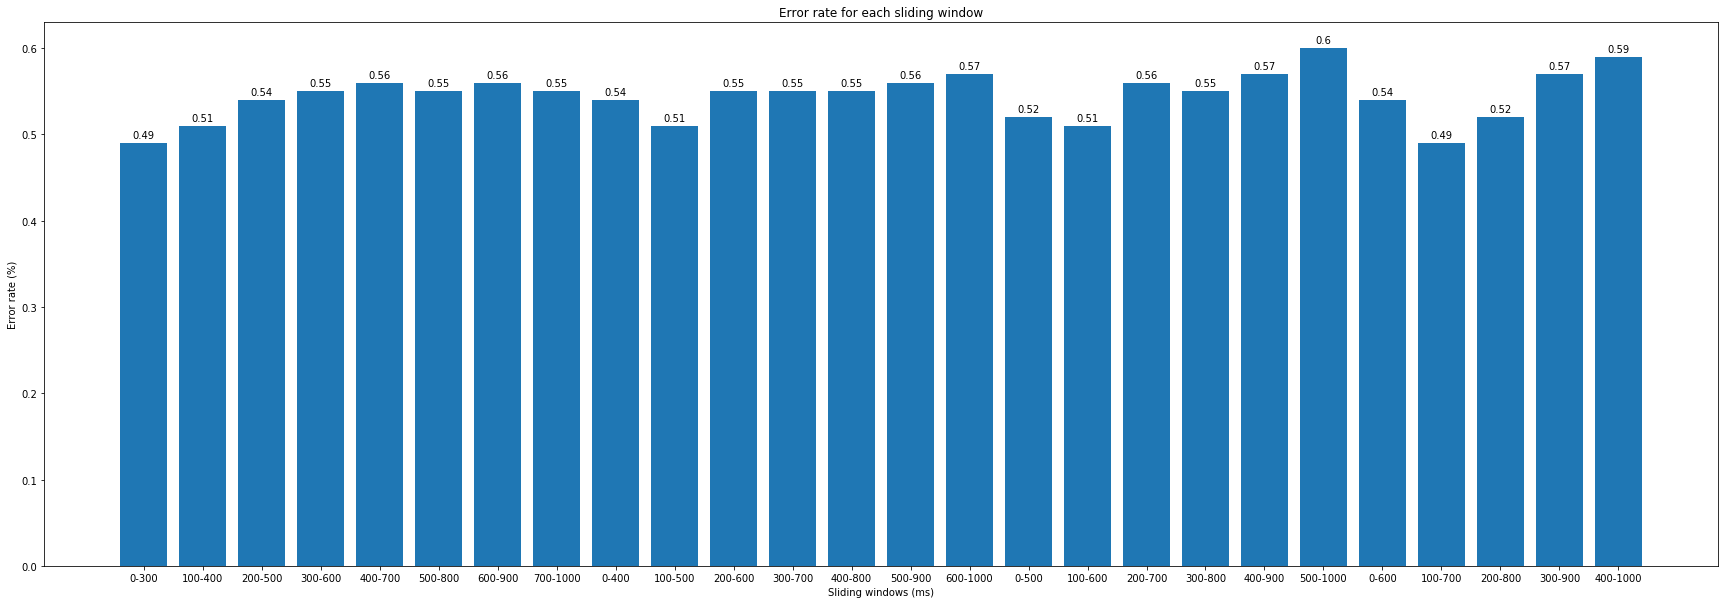

In [3]:
# For testing on random subsets

participants_train, participants_test = train_test_split(participants,test_size=0.2)
print(len(participants_train), len(participants_test))

# First 20 trials
#X_train_n,y_train_n, good_trial_count= prep_ml_graphs_first20(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="no_averaging")
#X_test_n, y_test_n, good_trial_count = prep_ml_graphs_first20(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="no_averaging")

#X_train_n,y_train_n, good_trial_count= prep_ml_graphs_first20(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="average_trials")
#X_test_n, y_test_n, good_trial_count = prep_ml_graphs_first20(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="average_trials")

#X_train_n,y_train_n, good_trial_count= prep_ml_graphs_first20(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="average_trials_and_participants")
#X_test_n, y_test_n, good_trial_count = prep_ml_graphs_first20(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="average_trials_and_participants")


#All trials
#X_train_n,y_train_n, good_trial_count= prep_ml_graphs(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="no_averaging")
#X_test_n, y_test_n, good_trial_count = prep_ml_graphs(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="no_averaging")

X_train_n,y_train_n, good_trial_count= prep_ml_graphs(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="average_trials")
X_test_n, y_test_n, good_trial_count = prep_ml_graphs(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="average_trials")

#X_train_n,y_train_n, good_trial_count= prep_ml_graphs(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="average_trials_and_participants")
#X_test_n, y_test_n, good_trial_count = prep_ml_graphs(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="average_trials_and_participants")




model = SVC(kernel = 'rbf', gamma = .001, C=1e-6)

prediction_error = [[0 for i in range(len(X_train_n[j]))] for j in range(len(X_train_n))]

for i in range(len(X_train_n)):
    for j in range(len(X_train_n[i])):
        model.fit(X_train_n[i][j], y_train_n[i][j])
        prediction_error[i][j] = np.mean(model.predict(X_test_n[i][j]) != y_test_n[i][j])

plot_error_rate_window(prediction_error, "11")